<a href="https://colab.research.google.com/github/hmehryar/Hm.JetscapeMl/blob/309-implementingtraining-pointnet-for-alpha_s-with-various-epochs-and-folds-and-finding-the-best-learning-rate/jet_ml_pointnet_alpha_s/jet_ml_pointnet_alpha_s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install --upgrade tensorflow
import tensorflow as tf

In [2]:
# #uncomment this cell when you are on COLAB
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
import sys
sys.path.insert(1,'/wsu/home/gy/gy40/gy4065/hm.jetscapeml.source')
sys.path.insert(1,'/content/drive/My Drive/Projects/110_JetscapeMl/hm.jetscapeml.source')
sys.path.insert(1,'/content/drive/MyDrive/Projects/110_JetscapeMl/hm.jetscapeml.source')
sys.path.insert(1,'/g/My Drive/Projects/110_JetscapeMl/hm.jetscapeml.source')
sys.path.insert(1,'G:\\My Drive\\Projects\\110_JetscapeMl\\hm.jetscapeml.source')

In [4]:
# loading libraries
print('Loading/Installing Package => Begin\n\n')
import jet_ml_dataset_builder.jet_ml_dataset_builder_utilities as util
from jet_ml_dataset_builder.jet_ml_dataset_builder_utilities import set_directory_paths
print('\nLoading/Installing Package => End\n\n')

Loading/Installing Package => Begin



Loading/Installing Package => End




In [5]:
print('\n########################################################################')
print('Checking the running platforms\n')
# Call the function and retrieve the dataset_directory_path and simulation_directory_path
# Access the dataset_directory_path and simulation_directory_path
dataset_directory_path, simulation_directory_path = set_directory_paths()
print('########################################################################\n')


########################################################################
Checking the running platforms

Python version: 3.11.5
OS: Windows
OS version: 10
running on Colab: False
Dataset Directory Path: D:\Projects\110_JetscapeMl\hm.jetscapeml.data\
Simulation Results Path: D:\Projects\110_JetscapeMl\hm.jetscapeml.data\simulation_results\
########################################################################



In [6]:
from jet_ml_dataset_builder.jet_ml_dataset_builder_utilities import get_label_items
from jet_ml_dataset_builder.jet_ml_dataset_builder_utilities import get_labels_str
label_items_dict = get_label_items()
label_str_dict=get_labels_str(label_items_dict)

Aggregatring all parameters values
label_items:
 {'y_class_label_items': ['MMAT', 'MLBT'], 'alpha_s_items': [0.2, 0.3, 0.4], 'q0_items': [1.5, 2.0, 2.5]}
Building required params for the loading the dataset file
labels_str:
 {'class_labels_str': 'MMAT_MLBT', 'alpha_s_items_str': '0.2_0.3_0.4', 'q0_items_str': '1.5_2.0_2.5'}


In [7]:
from jet_ml_dataset_builder.jet_ml_dataset_builder_utilities import get_dataset
dataset_size=1000
dataset_x, dataset_y=get_dataset(dataset_size,label_str_dict, dataset_directory_path,working_column=1)

Loading the whole dataset
dataset.x: <class 'numpy.ndarray'> 1024000 (1000, 32, 32)
dataset.y: <class 'numpy.ndarray'> 3000 (1000, 3)
Extract the working column#1 for classification
dataset.x: <class 'numpy.ndarray'> 1024000 (1000, 32, 32)
dataset.y: <class 'numpy.ndarray'> 1000 (1000,)
dataset.y(working_column) sample ['0.4' '0.4' '0.2' '0.4' '0.4' '0.3' '0.4' '0.3' '0.4' '0.4']


In [8]:
from jet_ml_models.pointnet import preprocess_dataset
(x_train,  y_train,x_test,  y_test)=preprocess_dataset(dataset_x, dataset_y,is_one_hot_encoded=False)

Pre-processing
dataset_x_points shape: (1000, 1024, 3)
deleting the original dataset after splitting ...
train_points: <class 'numpy.ndarray'> 2457600 (800, 1024, 3)
train_y: <class 'numpy.ndarray'> 800 (800,)
x_test_points: <class 'numpy.ndarray'> 614400 (200, 1024, 3)
y_test: <class 'numpy.ndarray'> 200 (200,)
y_test[:10]:
 ['0.4' '0.3' '0.4' '0.3' '0.4' '0.2' '0.2' '0.2' '0.4' '0.4']
Preprocess y_train and y_test
Encoding to sparse categorical variable
y_test_encoded:
 [2 1 2 1 2 0 0 0 2 2]


In [9]:
from jet_ml_models.pointnet import create_tf_dataset
# Example usage:
# Create TensorFlow Dataset for training data
dataset = create_tf_dataset(x_train, y_train)

# Create TensorFlow Dataset for test data
test_dataset = create_tf_dataset(x_test, y_test)

In [10]:
from jet_ml_models.pointnet import prepare_datasets
from jet_ml_models.pointnet import augment

# Prepare datasets for training
train_dataset, validation_dataset,test_dataset  = prepare_datasets(dataset, test_dataset, len(x_train), len(x_test), augment)

In [11]:
monitor = 'val_accuracy'  # 'val_accuracy' or 'val_loss'
n_epochs = 32

print("simulation_directory_path:",simulation_directory_path)
simulation_path=f'{simulation_directory_path}jetml_pointnet_classification_alpha_s_{label_str_dict["alpha_s_items_str"]}'
print("simulation_path:",simulation_path)
current_simulation_name=f'_size_{dataset_size}'
current_simulation_path=simulation_path+current_simulation_name

current_simulation_name=f'_epochs_{n_epochs}'
current_simulation_path=current_simulation_path+current_simulation_name

fold=1
current_simulation_name=f'_fold_{fold}'
current_simulation_path=current_simulation_path+current_simulation_name
print(current_simulation_path)

# Use ModelCheckpoint callback to save the best model
best_model_file_path = f'{current_simulation_path}_best_model.keras'
print("best_model_file_path:",best_model_file_path)

simulation_directory_path: D:\Projects\110_JetscapeMl\hm.jetscapeml.data\simulation_results\
simulation_path: D:\Projects\110_JetscapeMl\hm.jetscapeml.data\simulation_results\jetml_pointnet_classification_alpha_s_0.2_0.3_0.4
D:\Projects\110_JetscapeMl\hm.jetscapeml.data\simulation_results\jetml_pointnet_classification_alpha_s_0.2_0.3_0.4_size_1000_epochs_32_fold_1
best_model_file_path: D:\Projects\110_JetscapeMl\hm.jetscapeml.data\simulation_results\jetml_pointnet_classification_alpha_s_0.2_0.3_0.4_size_1000_epochs_32_fold_1_best_model.keras


In [12]:
from jet_ml_models.pointnet import build_pointnet_classifier_model

NUM_POINTS = 1024
#because alpha_s can get 3 values
NUM_CLASSES = 3
activation="softmax"
# activation="sigmoid"

pointnet=build_pointnet_classifier_model(NUM_POINTS=NUM_POINTS,NUM_CLASSES=NUM_CLASSES, activation=activation)


In [13]:
from jet_ml_models.pointnet import compile_pointnet_classifier_model_with_hyperparam
from jet_ml_models.pointnet import print_model_summary
learning_rate=0.001
loss='sparse_categorical_crossentropy'
# loss='categorical_crossentropy',

metrics='sparse_categorical_accuracy'
# metrics=['accuracy'],

pointnet=compile_pointnet_classifier_model_with_hyperparam(pointnet,learning_rate=learning_rate, loss=loss,metrics=metrics)
# print_model_summary(pointnet)

In [15]:
# %%timeit -n1 -r1
from jet_ml_models.pointnet import train_model_with_callbacks
monitor='val_sparse_categorical_accuracy'
with tf.device('/GPU:0'):
  model, history, train_time=train_model_with_callbacks(pointnet, train_dataset=train_dataset, validation_dataset=validation_dataset,monitor=monitor, best_model_file_path=best_model_file_path, n_epochs=n_epochs)

Epoch 1/32
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 52.5757 - sparse_categorical_accuracy: 0.3132
Epoch 1: val_sparse_categorical_accuracy improved from -inf to 0.36875, saving model to D:\Projects\110_JetscapeMl\hm.jetscapeml.data\simulation_results\jetml_pointnet_classification_alpha_s_0.2_0.3_0.4_size_1000_epochs_32_fold_1_best_model.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - loss: 52.1466 - sparse_categorical_accuracy: 0.3131 - val_loss: 35.8188 - val_sparse_categorical_accuracy: 0.3688
Epoch 2/32
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 35.7733 - sparse_categorical_accuracy: 0.3989
Epoch 2: val_sparse_categorical_accuracy did not improve from 0.36875
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - loss: 35.7688 - sparse_categorical_accuracy: 0.3972 - val_loss: 35.5434 - val_sparse_categorical_accuracy: 0.3562
Epoch 3/32
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 35.5557 - sparse_categorical_accuracy: 0.3482
Epoch 3: val_sparse_categorical_accuracy improved from 0.36875 t

In [16]:
print(train_time)
print(model)
print(history.history)

2.550873561700185
<Functional name=pointnet, built=True>
{'loss': [43.565025329589844, 35.68013000488281, 35.53199005126953, 35.392879486083984, 35.39972686767578, 35.361454010009766], 'sparse_categorical_accuracy': [0.3109374940395355, 0.36250001192092896, 0.3499999940395355, 0.3687500059604645, 0.34062498807907104, 0.3734374940395355], 'val_loss': [35.81879806518555, 35.54338073730469, 35.33433151245117, 35.310760498046875, 35.69879150390625, 35.3487434387207], 'val_sparse_categorical_accuracy': [0.3687500059604645, 0.35624998807907104, 0.3812499940395355, 0.3187499940395355, 0.3499999940395355, 0.3375000059604645]}


In [17]:
from jet_ml_models.pointnet import save_training_history
training_history_file_path_json,training_history_file_path_csv,training_history_file_path_csv = \
  save_training_history(history,current_simulation_path)

D:\Projects\110_JetscapeMl\hm.jetscapeml.data\simulation_results\jetml_pointnet_classification_alpha_s_0.2_0.3_0.4_size_1000_epochs_32_fold_1_training_history.json
D:\Projects\110_JetscapeMl\hm.jetscapeml.data\simulation_results\jetml_pointnet_classification_alpha_s_0.2_0.3_0.4_size_1000_epochs_32_fold_1_training_history.csv
D:\Projects\110_JetscapeMl\hm.jetscapeml.data\simulation_results\jetml_pointnet_classification_alpha_s_0.2_0.3_0.4_size_1000_epochs_32_fold_1_training_history.npy


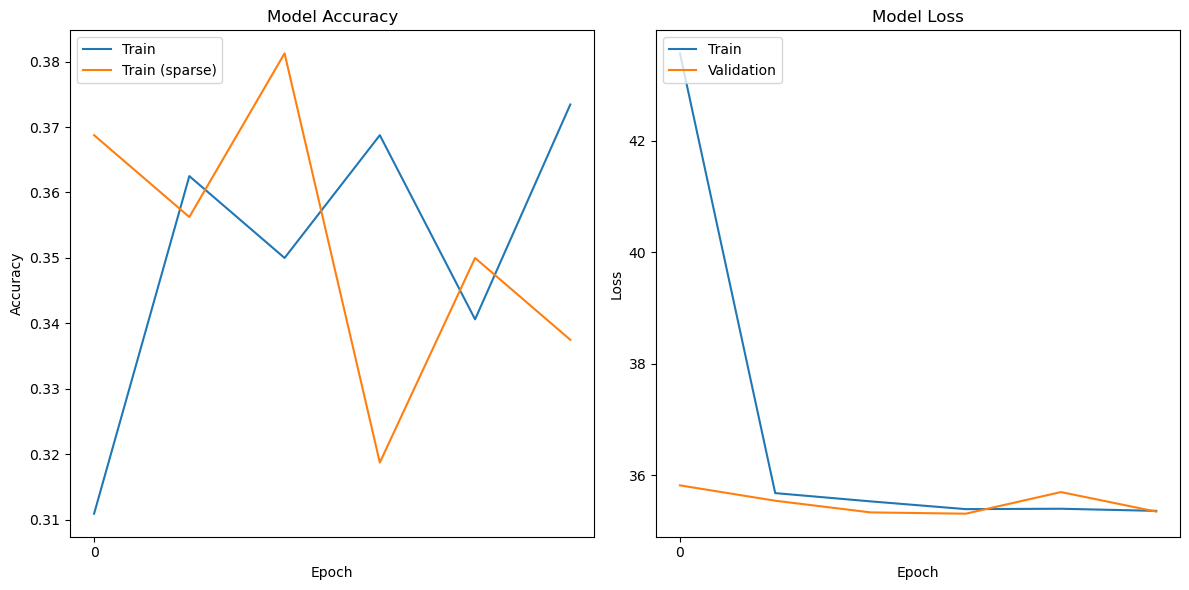

D:\Projects\110_JetscapeMl\hm.jetscapeml.data\simulation_results\jetml_pointnet_classification_alpha_s_0.2_0.3_0.4_size_1000_epochs_32_fold_1_accuracy_loss.png


In [18]:
from jet_ml_models.pointnet import plot_training_history
plot_training_history_path=plot_training_history(history,current_simulation_path)
print(plot_training_history_path)

In [19]:
from jet_ml_models.pointnet import evaluate_model
accuracy, confusion_matrix = evaluate_model(model,test_dataset=test_dataset)

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 377ms/step
Accuracy: 0.35
Confusion Matrix: [[28 14 26]
 [25 10 24]
 [23 18 32]]


In [20]:
from jet_ml_models.pointnet import save_kfold_results
results_kfold = []
results_kfold.append({
                  'Dataset Size': dataset_size,
                  'Classifier': model.name,
                  'Fold Number': fold,
                  'Accuracy': accuracy,
                  'Confusion Matrix': confusion_matrix,
                  'Train Time': train_time,
                  'Loss/Accuracy Plot Path': plot_training_history_path,
                  'Best Model Path': best_model_file_path
              })
save_kfold_results(results_kfold, current_simulation_path)

   Dataset Size Classifier  Fold Number  Accuracy  \
0          1000   pointnet            1      0.35   

                             Confusion Matrix  Train Time  \
0  [[28, 14, 26], [25, 10, 24], [23, 18, 32]]    2.550874   

                             Loss/Accuracy Plot Path  \
0  D:\Projects\110_JetscapeMl\hm.jetscapeml.data\...   

                                     Best Model Path  
0  D:\Projects\110_JetscapeMl\hm.jetscapeml.data\...  


,Dataset Size,Classifier,Fold Number,Accuracy,Confusion Matrix,Train Time,Loss/Accuracy Plot Path,Best Model Path
0,1000,pointnet,1,0.35,"[[28, 14, 26], [25, 10, 24], [23, 18, 32]]",2.550874,D:\Projects\110_JetscapeMl\hm.jetscapeml.data\...,D:\Projects\110_JetscapeMl\hm.jetscapeml.data\...
